# Number Plate Detection using Roboflow Model

## Download and Import Dependencies

In [ ]:
!pip install roboflow

In [ ]:
!pip install easyocr
!pip install imutils

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import easyocr

## Import your Model
Dont Share this code as it includes your private API key

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="uQVioNskcr8qhdMy3S4P")
project = rf.workspace().project("number-plate-detection-qydiz")
model = project.version(1).model

In [ ]:
print(type(model))

<class 'roboflow.models.object_detection.ObjectDetectionModel'>


## Read and Resize File

In [ ]:
image_path = '/content/WhatsApp Image 2023-03-15 at 22.07.12.jpeg'
img = cv2.imread(image_path)

img = cv2.resize(img, (640, 640))

# save the resized image
cv2.imwrite('/content/resized_image.jpg', img)

## Get Predictions

In [ ]:
print(model.predict('/content/resized_image.jpg', confidence=40, overlap=30).save("/content/prediction.jpg"))

None


In [ ]:
json_data = model.predict("/content/resized_image.jpg", confidence=40, overlap=30).json()

## Crop Image

In [ ]:
cropped_image = img[int(y-(height/2)): int(y + (height/2)), int(x-(width/2)): int(x + (width/2))]

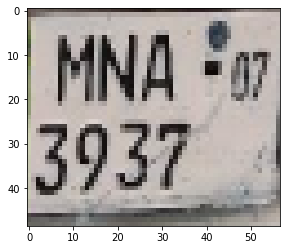

In [ ]:
plt.imshow(cropped_image)
plt.show()

## Perform OCR

In [ ]:
reader = easyocr.Reader(['en'])

In [ ]:
result = reader.readtext(cropped_image)
print(result)

[([[3, 3], [37, 3], [37, 23], [3, 23]], 'MNA', 0.9991212875596811), ([[0, 22], [40, 22], [40, 46], [0, 46]], '3937', 0.9988073706626892)]
